In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

In [3]:
#데이터 불러오기
df1  = pd.read_csv("LPOINT_BIG_COMP_01_DEMO.csv")
df2  = pd.read_csv("LPOINT_BIG_COMP_02_PDDE.csv")

df4  = pd.read_csv("LPOINT_BIG_COMP_04_PD_CLAC.csv")
df5  = pd.read_csv("LPOINT_BIG_COMP_05_BR.csv")
df6  = pd.read_csv("LPOINT_BIG_COMP_06_LPAY.csv")

C:\Users\ecopl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df6["lpay"] = 1
df6

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,lpay
0,M629656521,210803210311226,A03,1,20210803,21,10900,1
1,M216016456,210803130167542,L01,2,20210803,13,6860,1
2,M205142844,210803140275112,A02,1,20210803,14,9000,1
3,M737010483,210803040637594,A06,2,20210803,4,36740,1
4,M707775545,210803140675502,A06,2,20210803,14,138500,1
...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,1
353180,M470112503,210104210652271,A06,2,20210104,21,6440,1
353181,M748878049,210119200278240,A02,1,20210119,20,17600,1
353182,M748878049,210119180267206,A02,1,20210119,18,12400,1


In [5]:
data0 = pd.merge(df2,df1,how="left",on="cust")
data0 = pd.merge(data0,df4,how="left",on="pd_c")
data0 = pd.merge(data0,df5,how="left",on=["br_c","cop_c"])
data0 = pd.merge(data0,df6.drop("rct_no",axis=1),how="left",on=["cust","cop_c","chnl_dv","de_dt","de_hr","buy_am"])
data0["lpay"].fillna(0, inplace = True)
data0["de_dt"] = pd.to_datetime(data0["de_dt"].astype(int).astype(str))
data0

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv_x,pd_nm,clac_hlv_nm,clac_mcls_nm,zon_hlv_y,zon_mcls,lpay
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,0.0
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,0.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,0.0
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,0.0
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382534,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,0.0
4382535,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,0.0
4382536,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,0.0
4382537,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,0.0


In [6]:
#유통사 별 데이터셋 분리
data_a01 = data0[data0["cop_c"] == "A01"]
data_a02 = data0[data0["cop_c"] == "A02"]
data_a03 = data0[data0["cop_c"] == "A03"]
data_a04 = data0[data0["cop_c"] == "A04"]
data_a05 = data0[data0["cop_c"] == "A05"]
data_a06 = data0[data0["cop_c"] == "A06"]

# EDA

In [6]:
#Jupyter 한글 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## A01

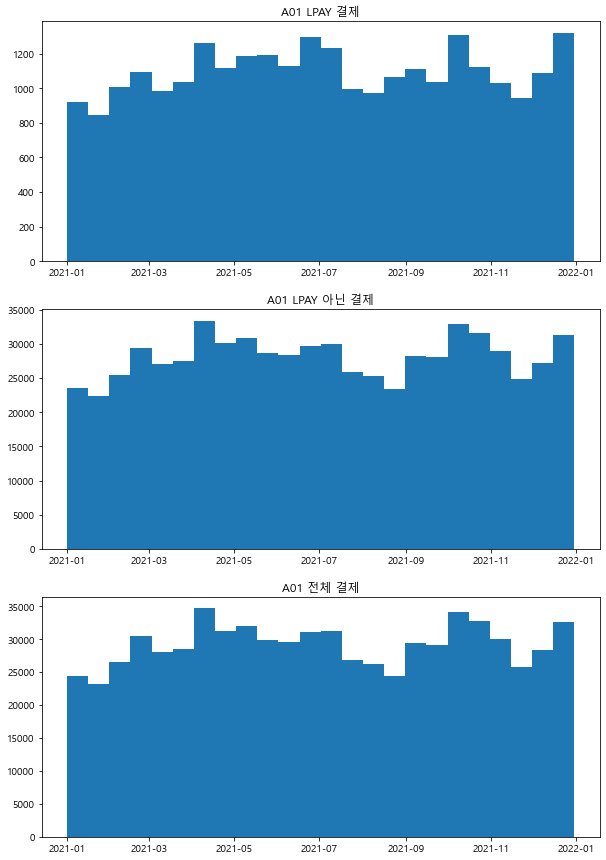

In [7]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a01[data_a01["lpay"]==1])
plt.title("A01 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a01[data_a01["lpay"]==0])
plt.title("A01 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a01)
plt.title("A01 전체 결제")

plt.show()

## A02

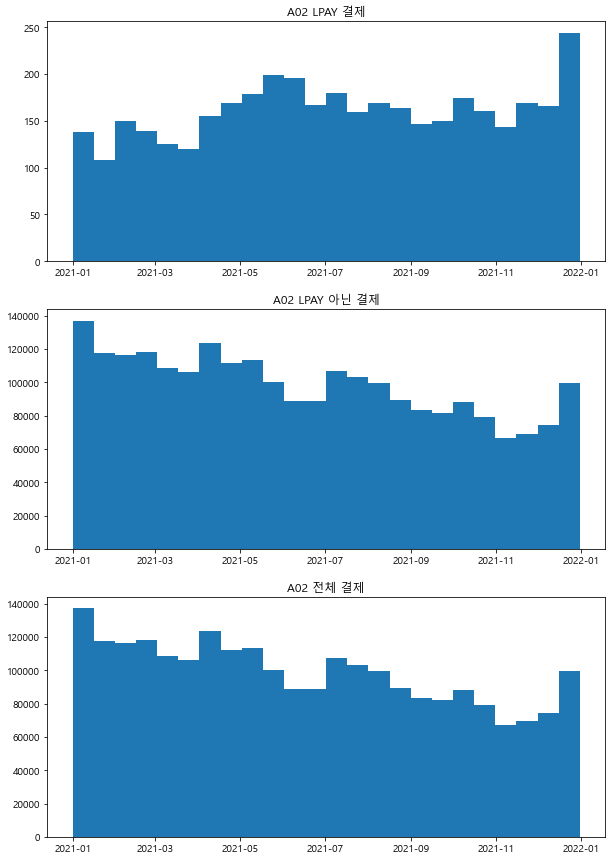

In [8]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a02[data_a02["lpay"]==1])
plt.title("A02 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a02[data_a02["lpay"]==0])
plt.title("A02 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a02)
plt.title("A02 전체 결제")

plt.show()

## A03

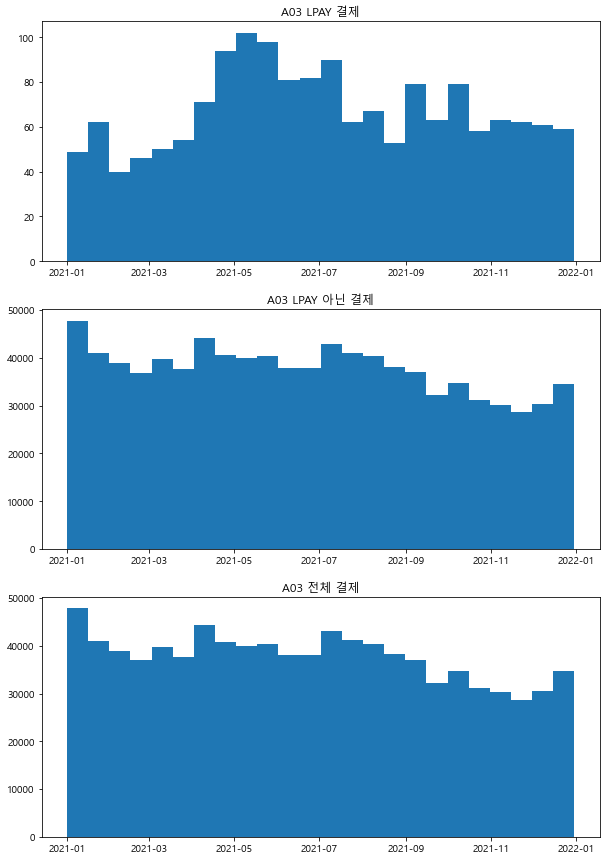

In [9]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a03[data_a03["lpay"]==1])
plt.title("A03 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a03[data_a03["lpay"]==0])
plt.title("A03 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a03)
plt.title("A03 전체 결제")

plt.show()

## A04

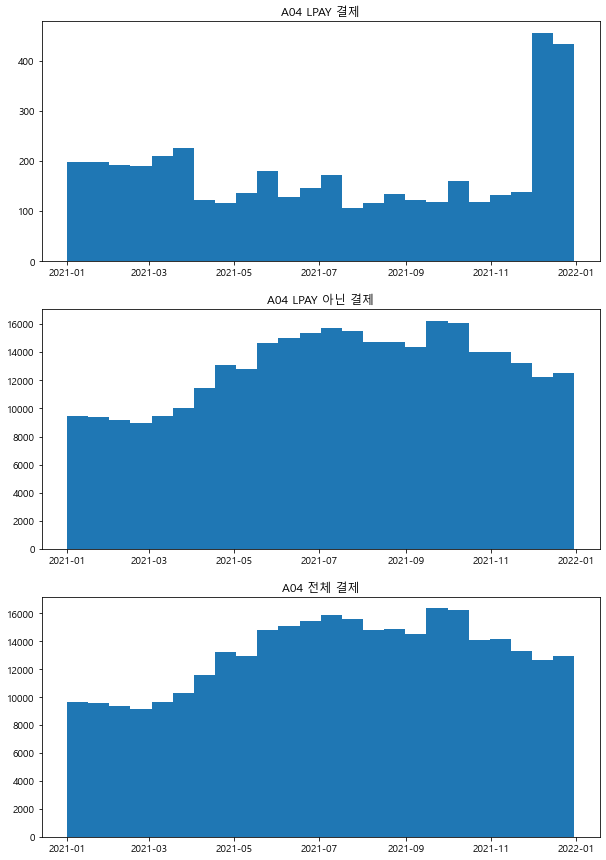

In [10]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a04[data_a04["lpay"]==1])
plt.title("A04 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a04[data_a04["lpay"]==0])
plt.title("A04 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a04)
plt.title("A04 전체 결제")

plt.show()

12월 lpay로 세븐일레븐 10000원 이상 결제시, 5000p 또는 10000p 지급

https://blog.naver.com/100nyun/222592903896

<ipython-input-29-feb1a0a59312>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["after_12"] = (tmp["de_dt"].dt.month >= 12).astype(int)


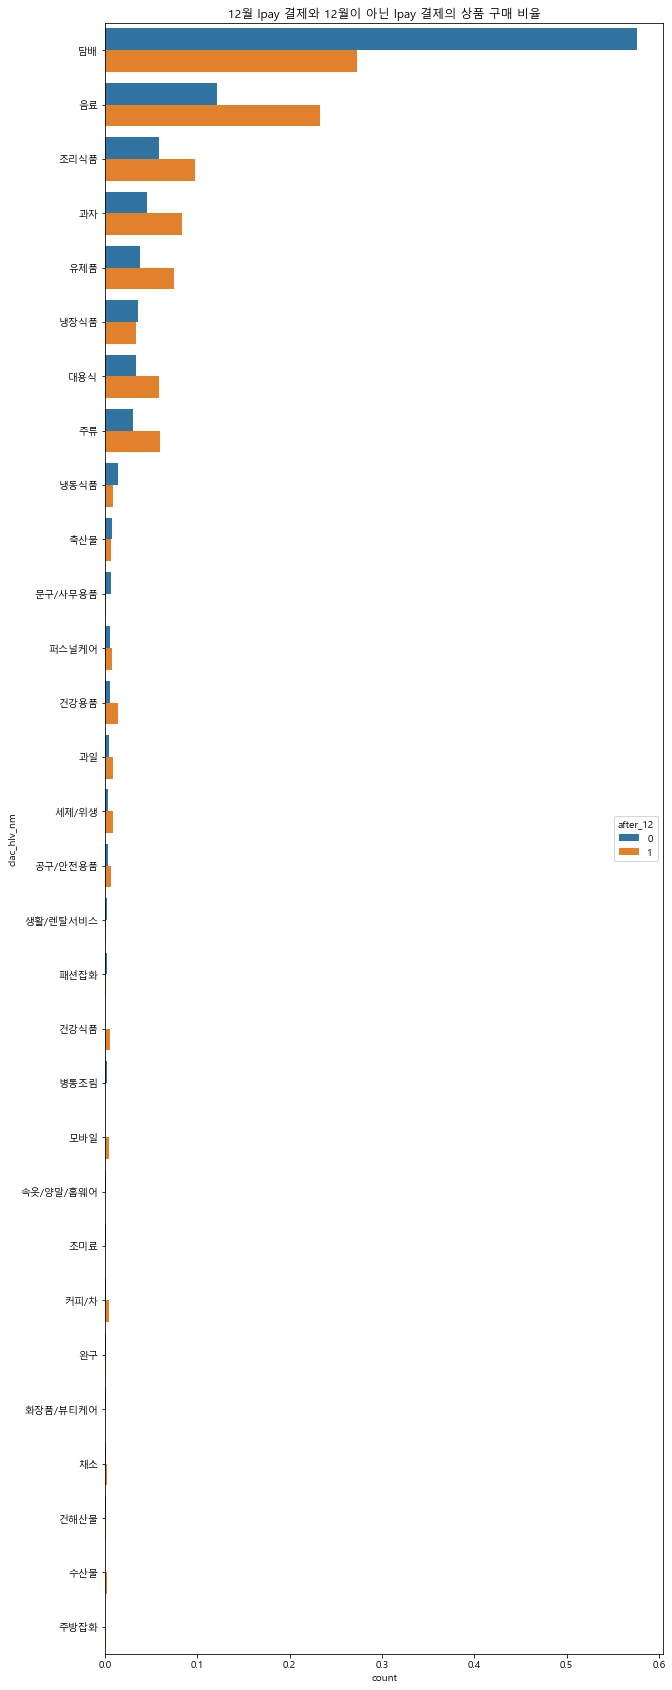

In [29]:
#품목 별 변화량 확인
tmp = data_a04[data_a04["lpay"]==1]
tmp["after_12"] = (tmp["de_dt"].dt.month >= 12).astype(int)

tmp_tmp = tmp.value_counts(["clac_hlv_nm","after_12"]).reset_index().rename(columns={0:"count"})
tmp_tmp.loc[tmp_tmp["after_12"] == 0, "count"] /= tmp_tmp.loc[tmp_tmp["after_12"] == 0, "count"].sum()
tmp_tmp.loc[tmp_tmp["after_12"] == 1, "count"] /= tmp_tmp.loc[tmp_tmp["after_12"] == 1, "count"].sum()

plt.figure(figsize=(10, 30))
sns.barplot(y='clac_hlv_nm', x="count", hue='after_12', data=tmp_tmp)
plt.title("12월 lpay 결제와 12월이 아닌 lpay 결제의 상품 구매 비율")
plt.show()

담배 구매 비율이 많이 줄었다.

-> 프로모션에 담배가 포함되지 않았기 때문임. 프로모션이 영향이 있었다!

## A05

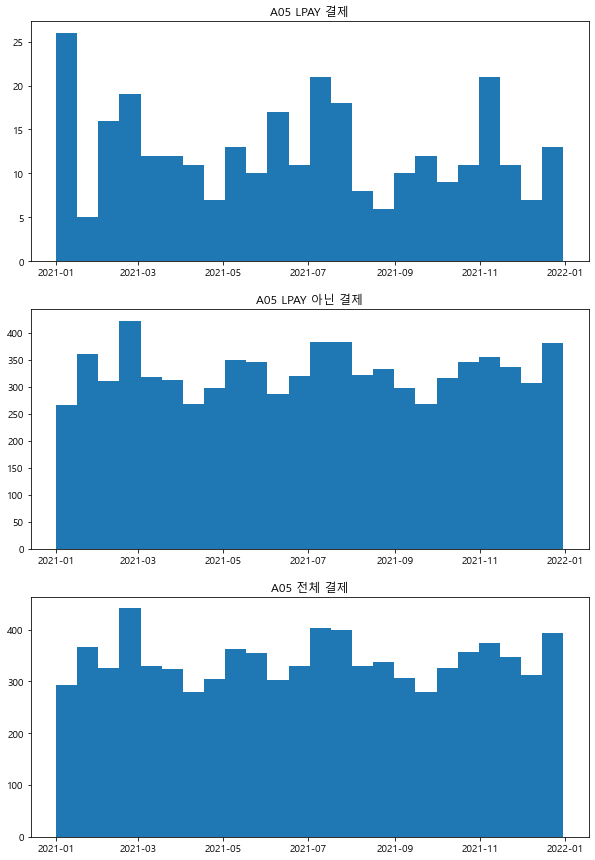

In [11]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a05[data_a05["lpay"]==1])
plt.title("A05 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a05[data_a05["lpay"]==0])
plt.title("A05 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a05)
plt.title("A05 전체 결제")

plt.show()

## A06

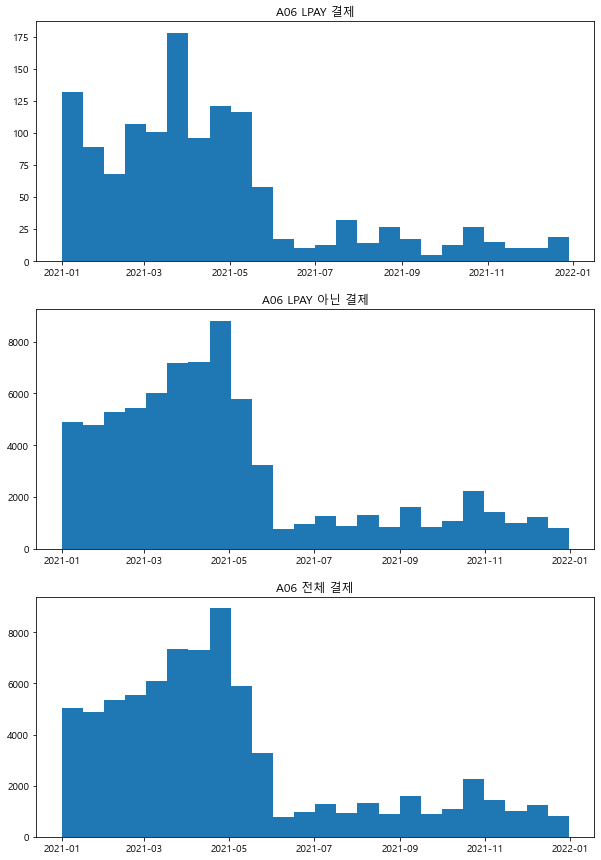

In [12]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.hist(x = "de_dt", bins=24, data=data_a06[data_a06["lpay"]==1])
plt.title("A06 LPAY 결제")

plt.subplot(3, 1, 2)
plt.hist(x = "de_dt", bins=24, data=data_a06[data_a06["lpay"]==0])
plt.title("A06 LPAY 아닌 결제")

plt.subplot(3, 1, 3)
plt.hist(x = "de_dt", bins=24, data=data_a06)
plt.title("A06 전체 결제")

plt.show()

<AxesSubplot:xlabel='0', ylabel='clac_hlv_nm'>

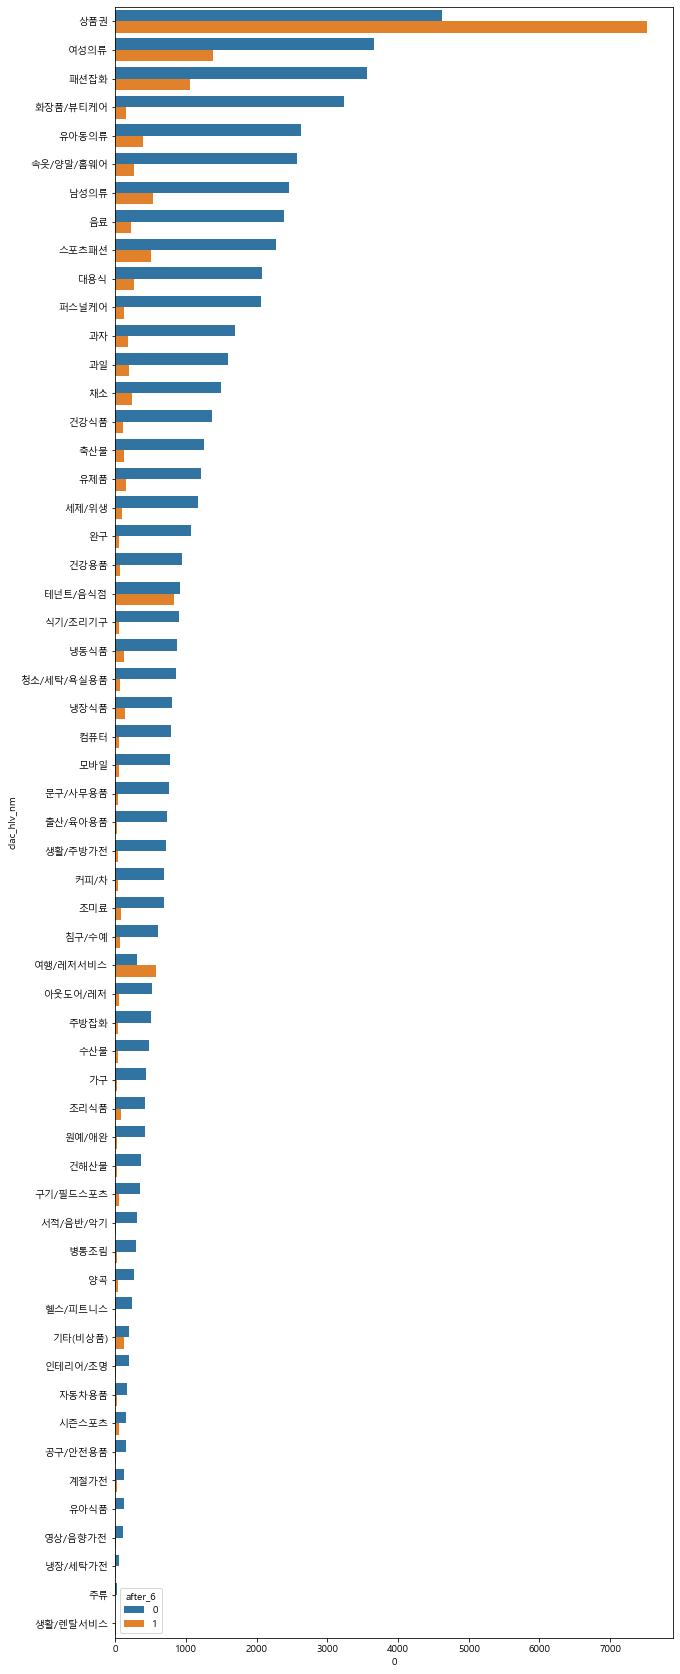

In [13]:
#품목 별 변화량 확인
tmp = data_a06.copy()
tmp["after_6"] = (tmp["de_dt"].dt.month >= 6).astype(int)

tmp_tmp = tmp.value_counts(["clac_hlv_nm","after_6"]).reset_index()
plt.figure(figsize=(10, 30))
sns.barplot(y='clac_hlv_nm', x=0, hue='after_6', data=tmp_tmp)

# 유통사 매출 구조를 통한 유통사 테마 추측

In [7]:
A01_pdnm_top20=data_a01.pd_nm.value_counts()[0:20]
A02_pdnm_top20=data_a02.pd_nm.value_counts()[0:20]
A03_pdnm_top20=data_a03.pd_nm.value_counts()[0:20]
A04_pdnm_top20=data_a04.pd_nm.value_counts()[0:20]
A05_pdnm_top20=data_a05.pd_nm.value_counts()[0:20]
A06_pdnm_top20=data_a06.pd_nm.value_counts()[0:20]

In [9]:
A01_pdnm_total_buyam_top20=data_a01.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]
A02_pdnm_total_buyam_top20=data_a02.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]
A03_pdnm_total_buyam_top20=data_a03.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]
A04_pdnm_total_buyam_top20=data_a04.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]
A05_pdnm_total_buyam_top20=data_a05.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]
A06_pdnm_total_buyam_top20=data_a06.groupby('pd_nm').sum().sort_values(by='buy_am',ascending=False)[0:20]

## A01 추측

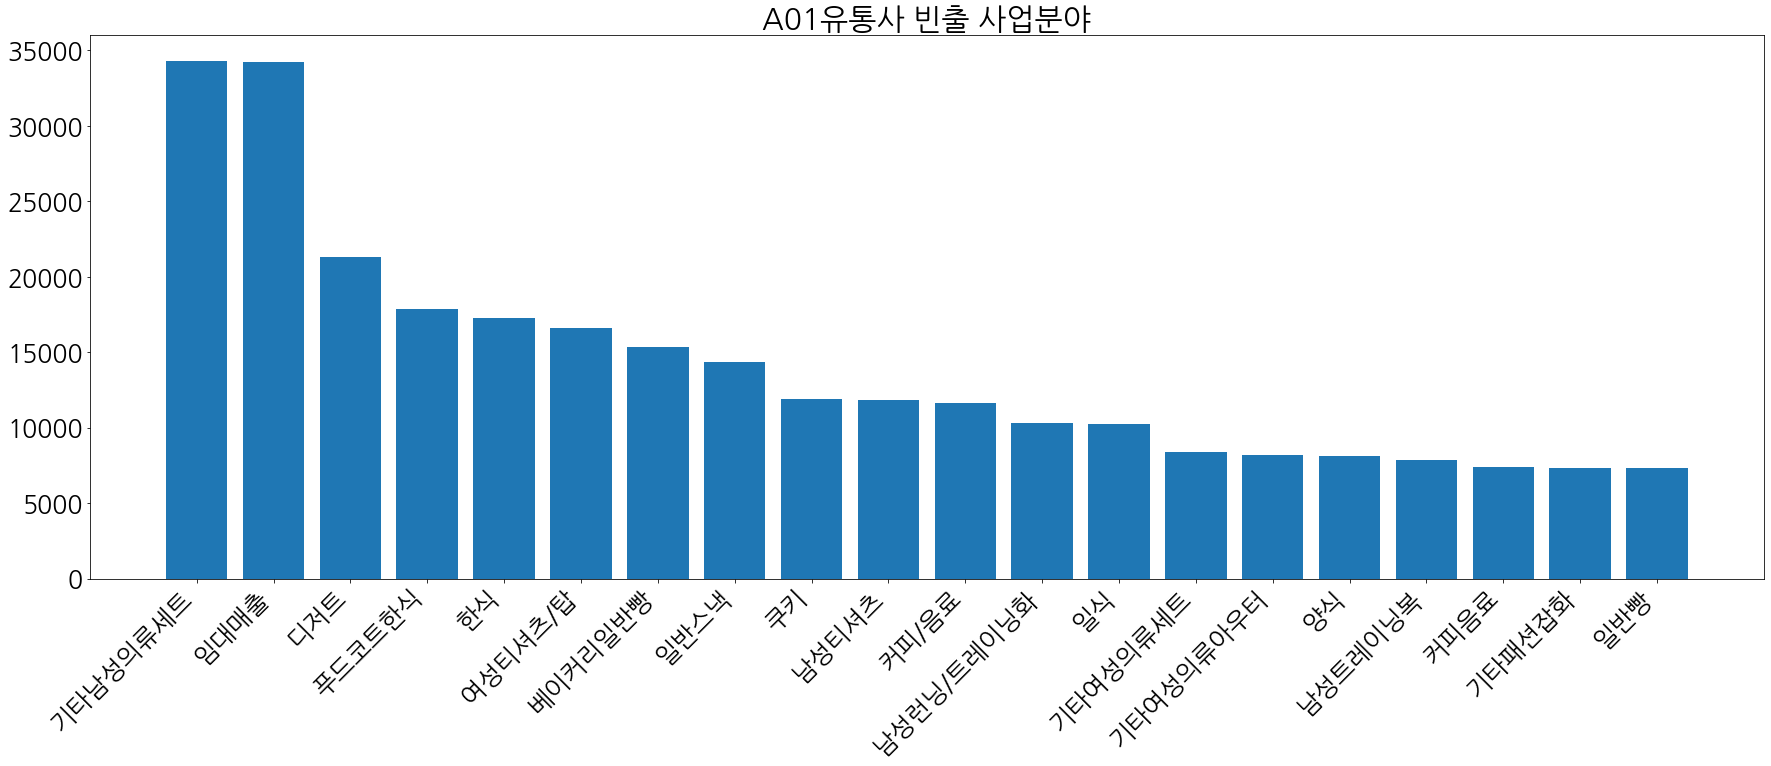

In [10]:
plt.rc('font',family='NanumGothic')
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A01_pdnm_top20.index,A01_pdnm_top20.values)
plt.title('A01유통사 빈출 사업분야')
plt.show()

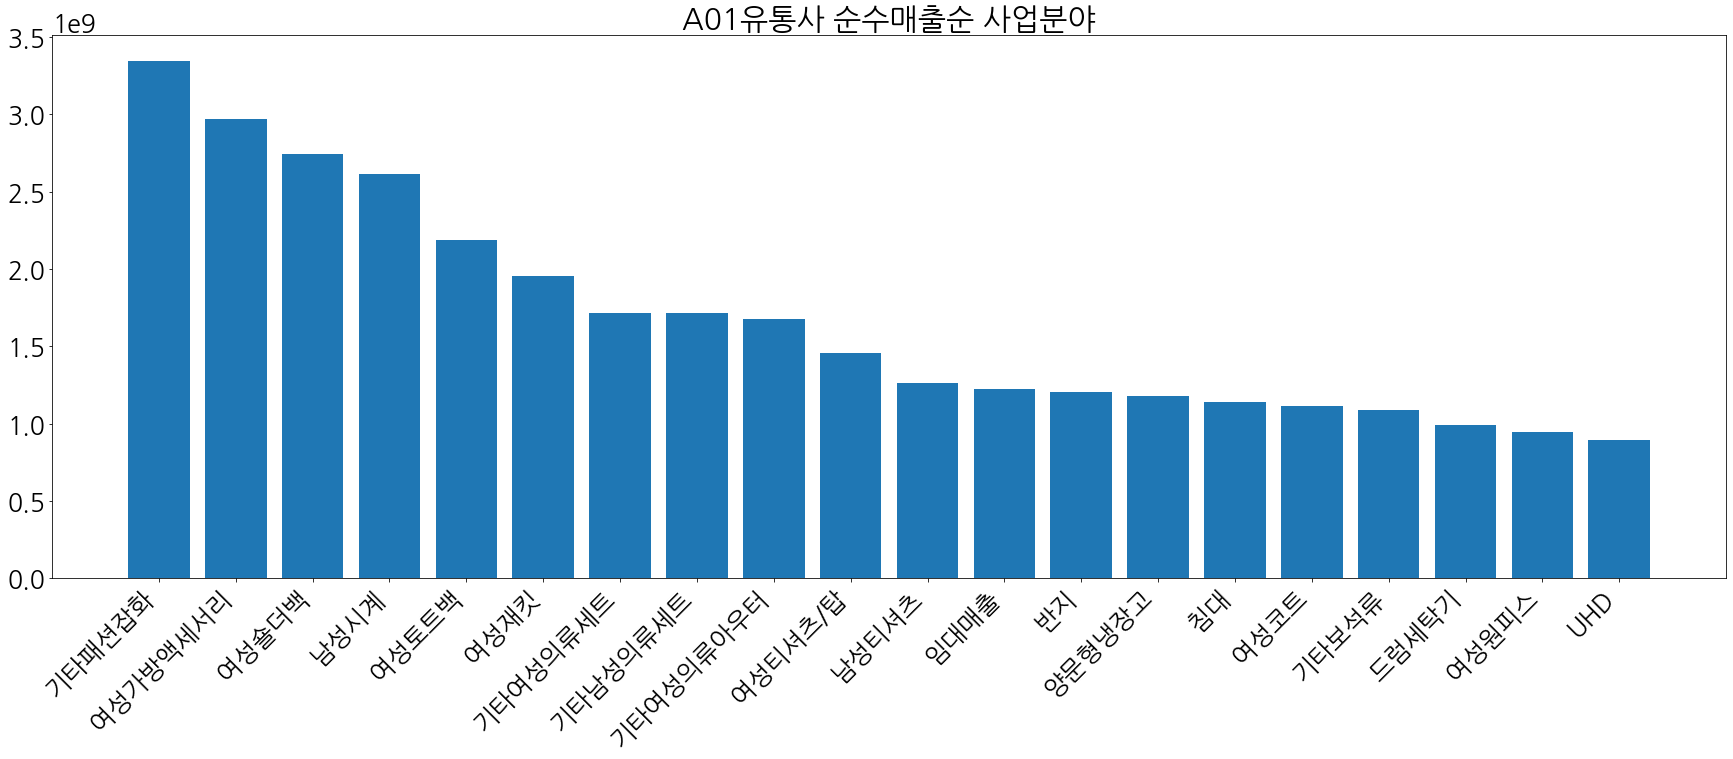

In [11]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A01_pdnm_total_buyam_top20.index,A01_pdnm_total_buyam_top20.buy_am)
plt.title('A01유통사 순수매출순 사업분야')
plt.show()

In [13]:
#위의 결과를 토대로, A01유통사는 오프라인 종합쇼핑몰(백화점) 쪽이아닐까...예상
#이 경우 점포코드는 종합쇼핑몰에 내점한 세부 점포들이 아닐까
data_a01.chnl_dv.value_counts()

1    694601
2      6244
Name: chnl_dv, dtype: int64

In [15]:
data_a01[data_a01.br_c.isnull()].chnl_dv.value_counts() #현장에서 사도 온라인(ex:OO페이)같은 경우엔 점포코드가 안뜨게 되는듯

2    6244
Name: chnl_dv, dtype: int64

## A02 추측

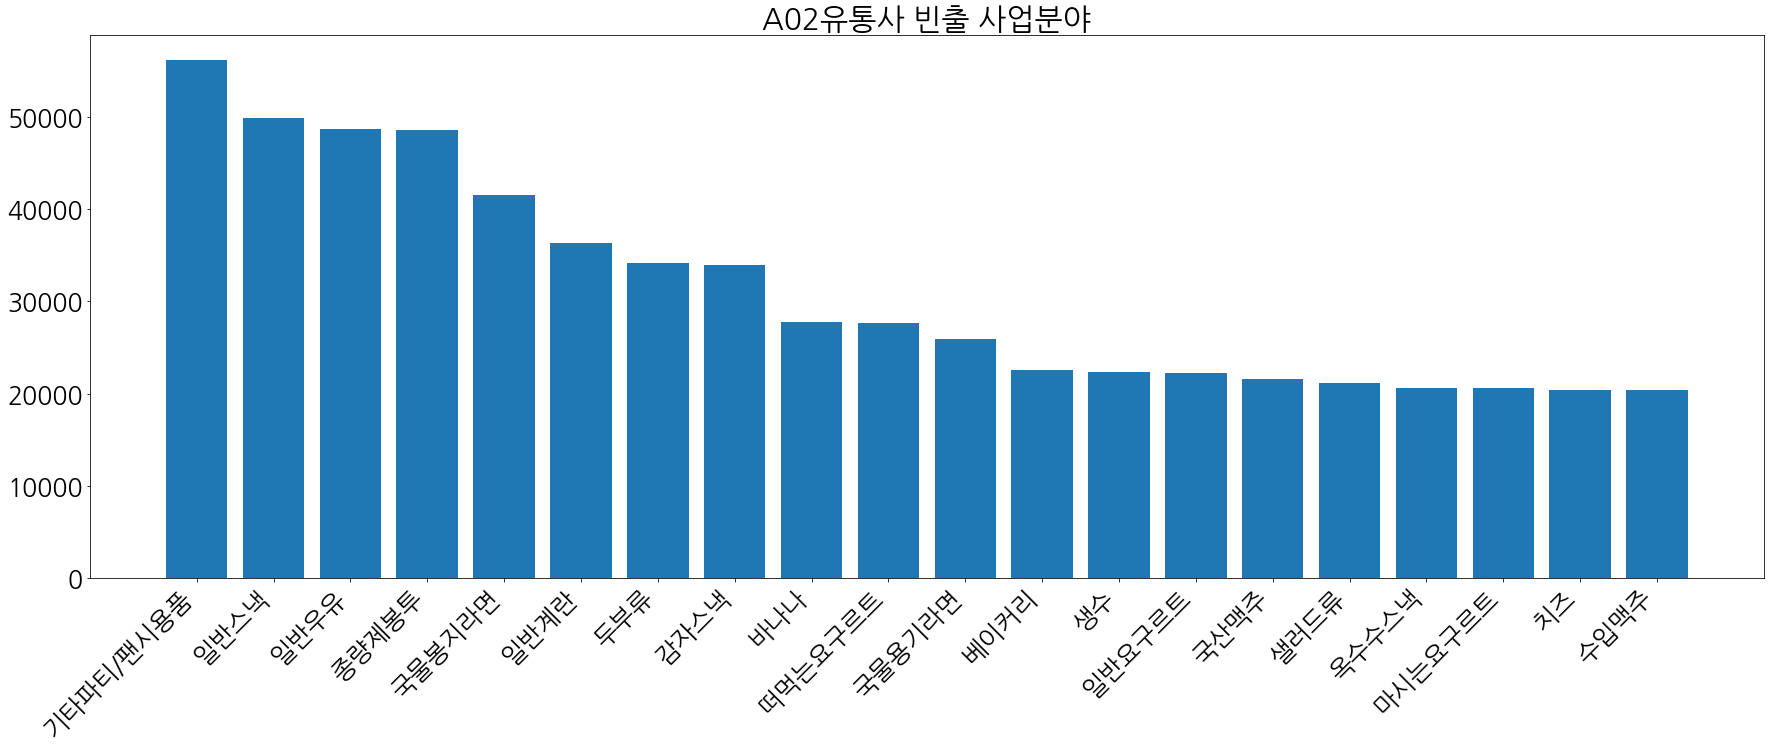

In [16]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A02_pdnm_top20.index,A02_pdnm_top20.values)
plt.title('A02유통사 빈출 사업분야')
plt.show()

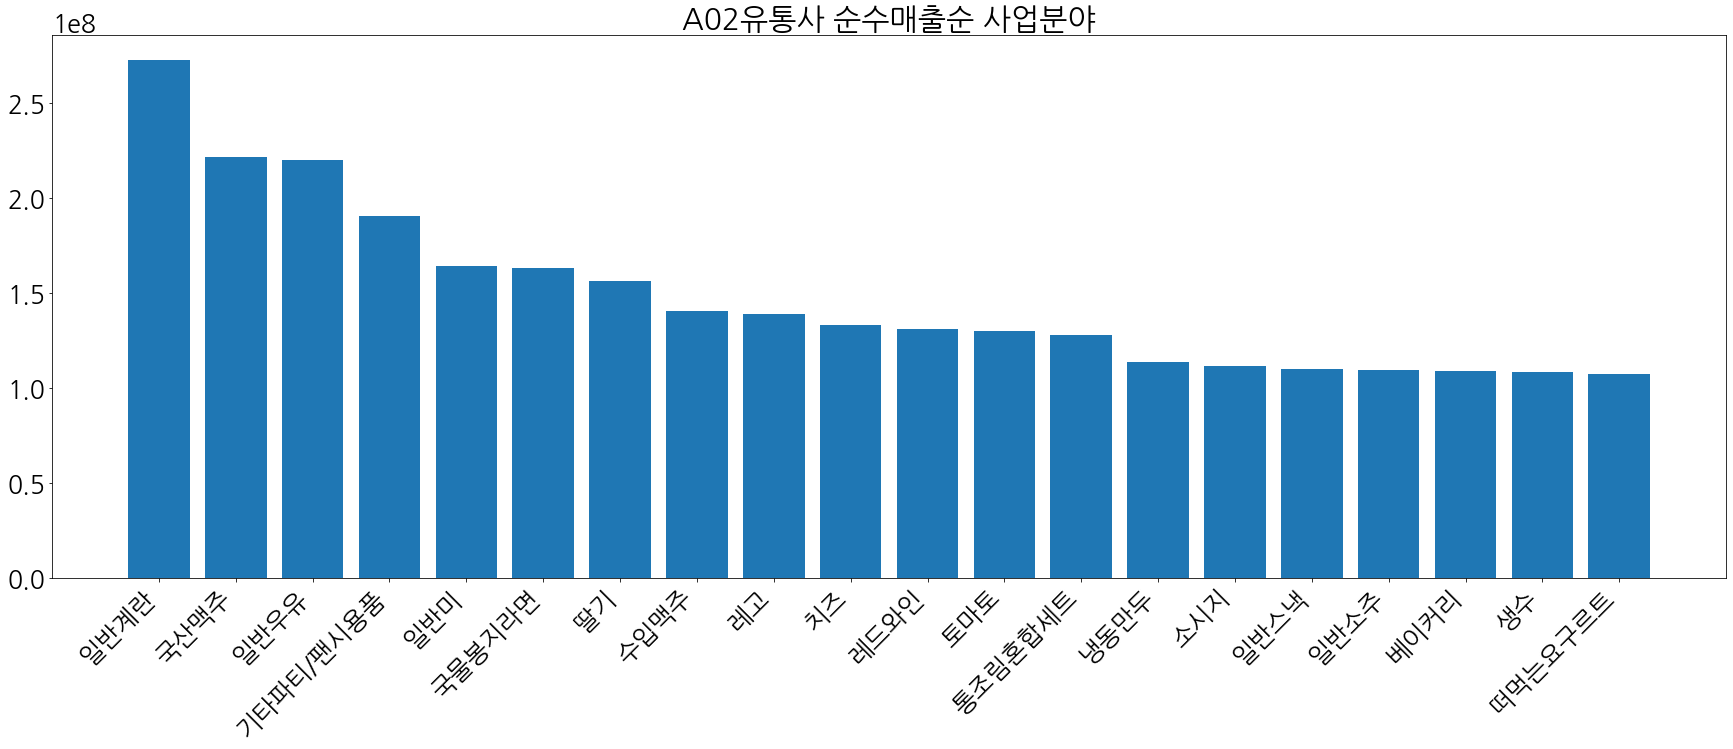

In [17]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A02_pdnm_total_buyam_top20.index,A02_pdnm_total_buyam_top20.buy_am)
plt.title('A02유통사 순수매출순 사업분야')
plt.show()

In [19]:
#위 결과를 토대로 A02는 대형마트? 계열의 유통사일 것으로 예상
data_a02.chnl_dv.value_counts()

1    2144994
2     230081
Name: chnl_dv, dtype: int64

## A03 추측

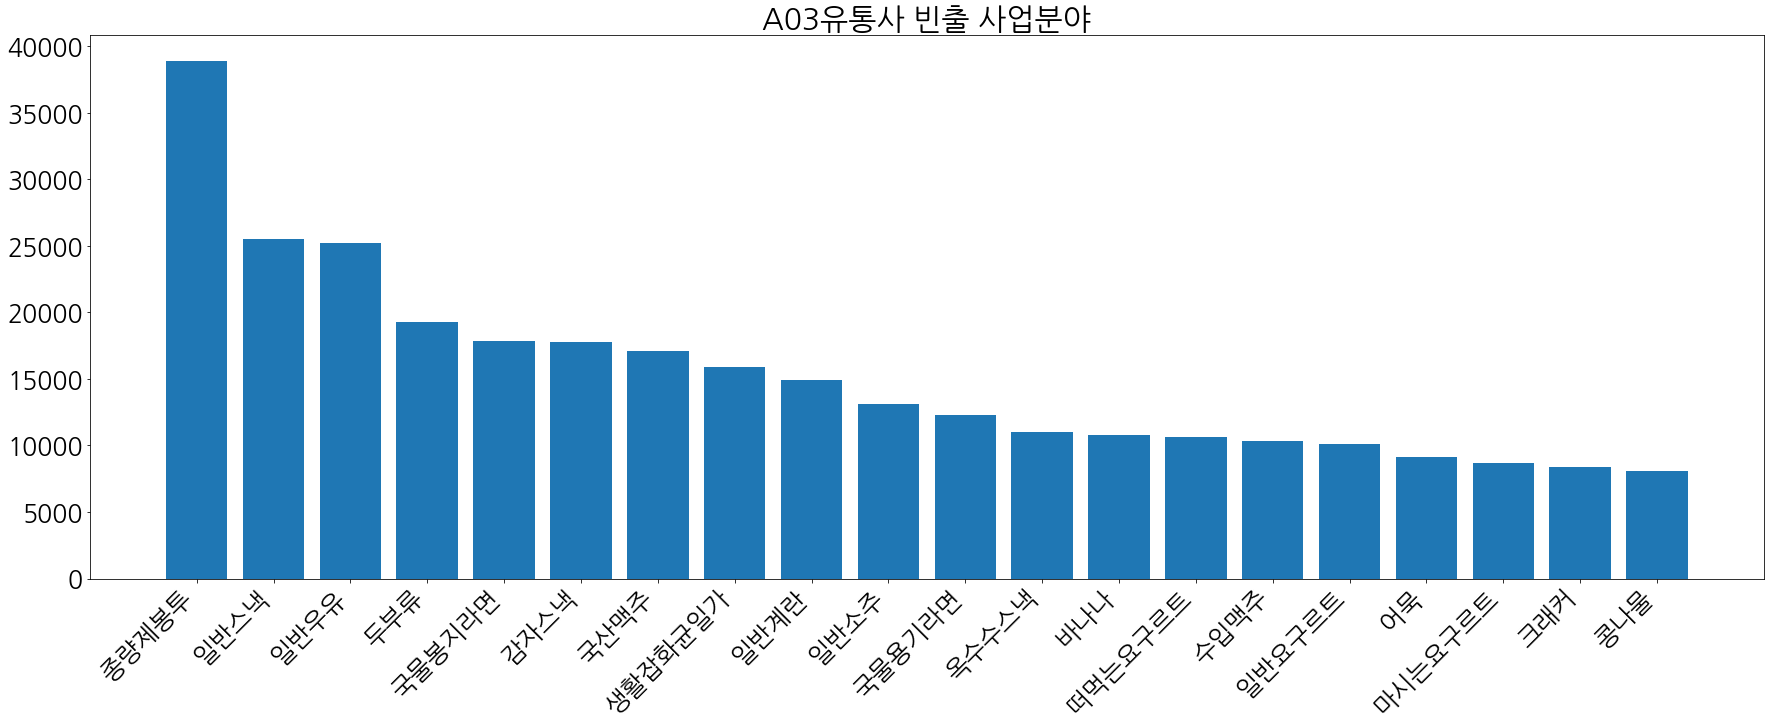

In [20]:
plt.rc('font',family='NanumGothic')
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A03_pdnm_top20.index,A03_pdnm_top20.values)
plt.title('A03유통사 빈출 사업분야')
plt.show()

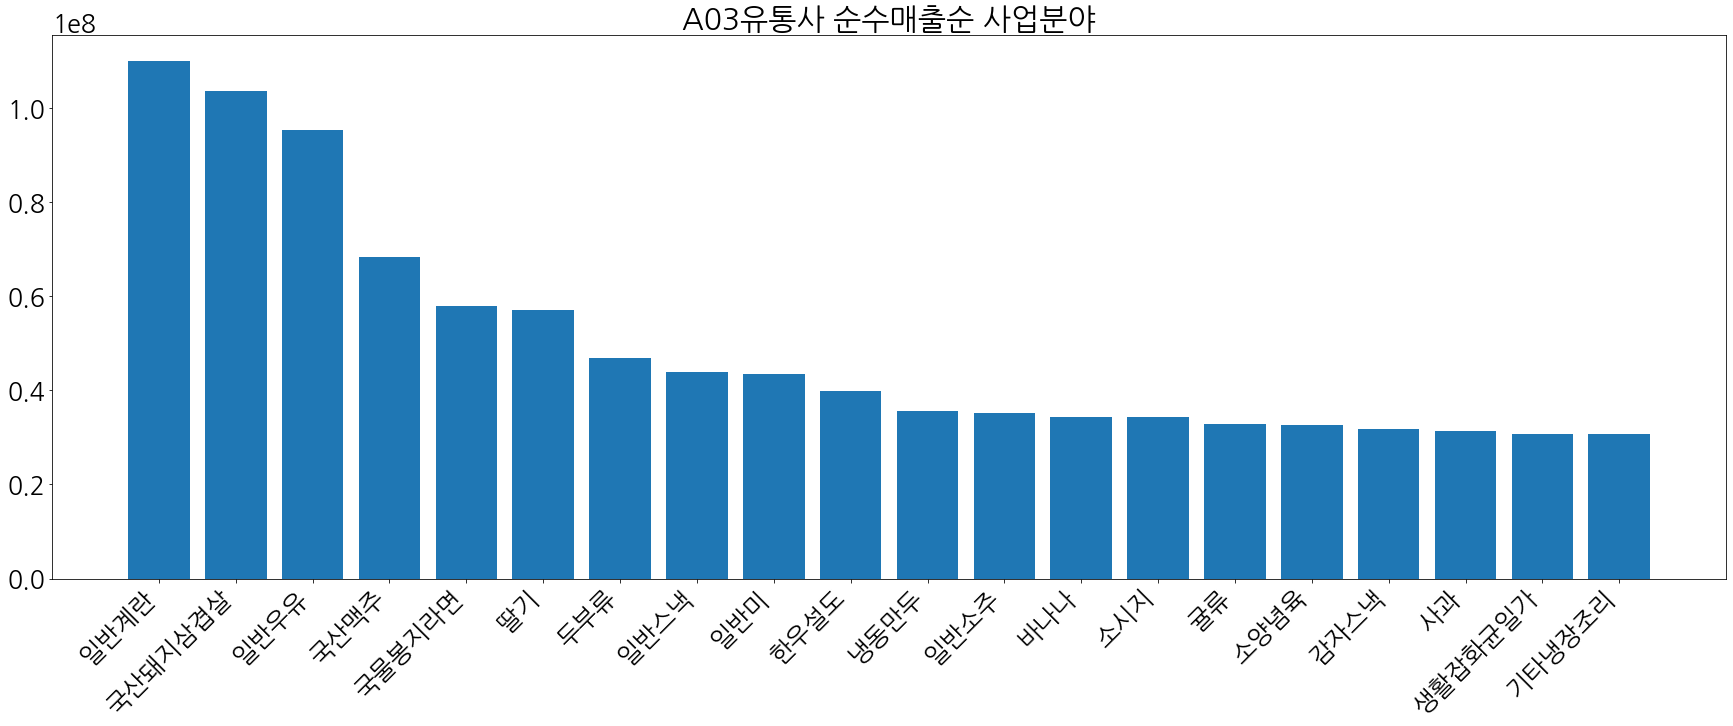

In [21]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A03_pdnm_total_buyam_top20.index,A03_pdnm_total_buyam_top20.buy_am)
plt.title('A03유통사 순수매출순 사업분야')
plt.show()

In [23]:
#A02랑 매우 흡사한 경향...하지만 일반미, 팬시&파티용품이 A02에는 상위 항목에 있으나 A02에는 없는걸로 보아
#A03은 롯데슈퍼가 아닐까 예상
data_a03.chnl_dv.value_counts()

1    790829
2    114879
Name: chnl_dv, dtype: int64

## A04 추측

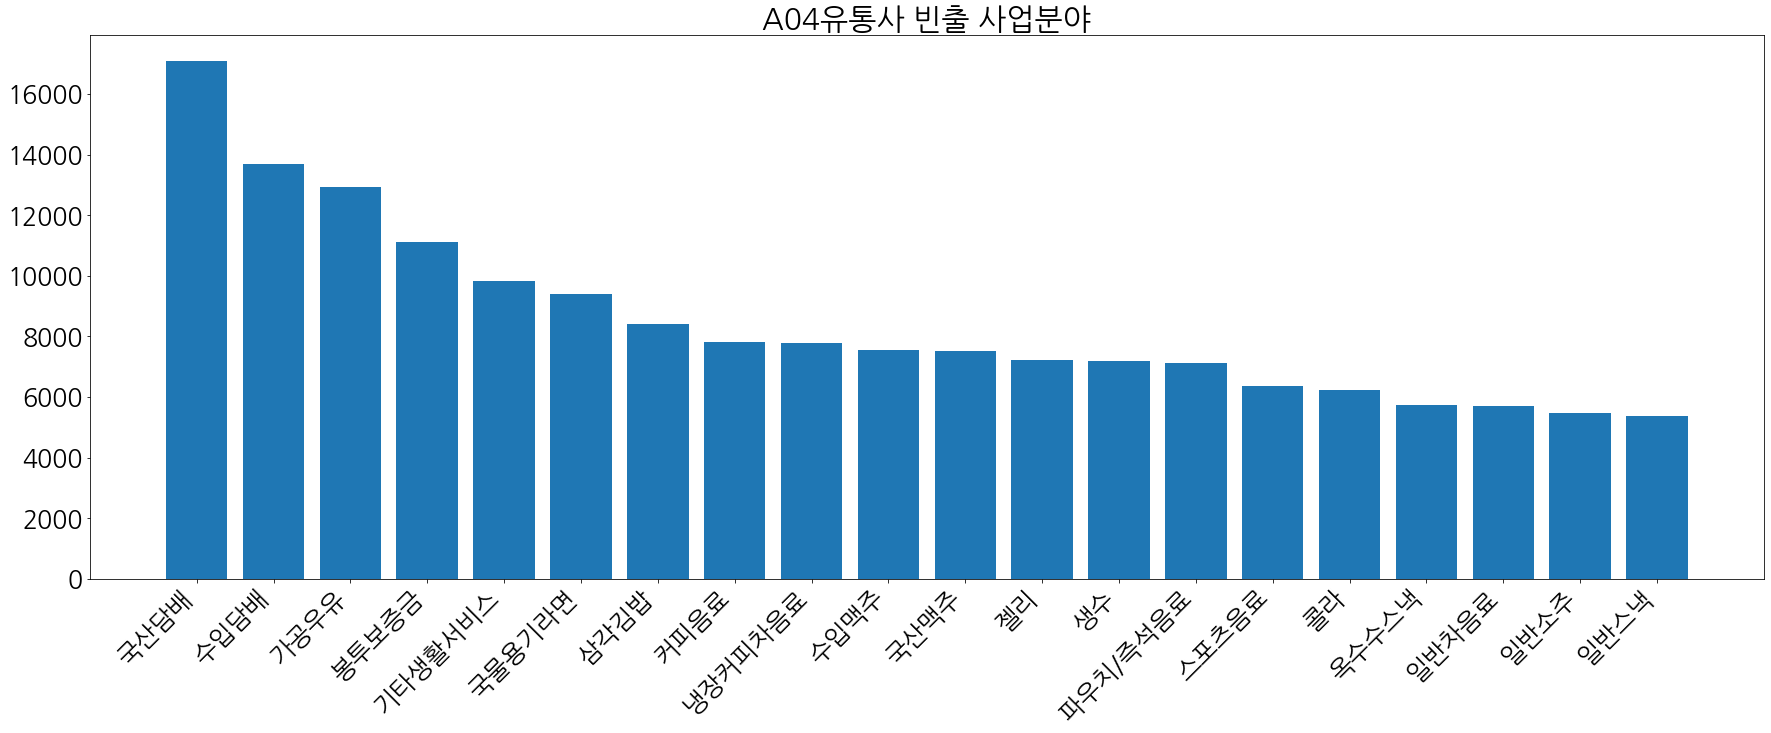

In [24]:
plt.rc('font',family='NanumGothic')
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A04_pdnm_top20.index,A04_pdnm_top20.values)
plt.title('A04유통사 빈출 사업분야')
plt.show()

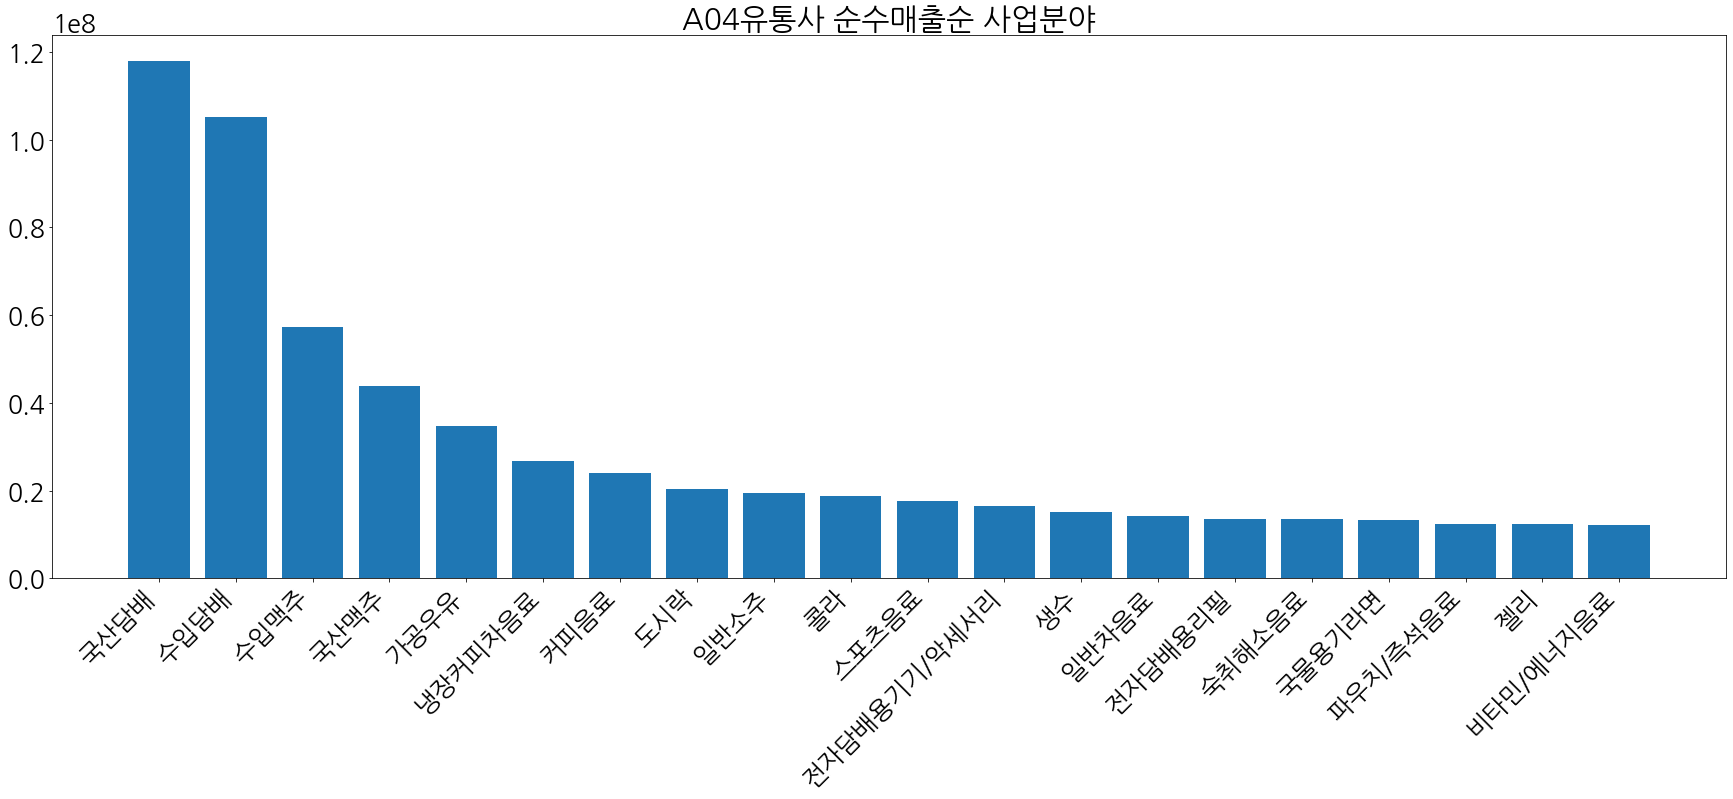

In [25]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A04_pdnm_total_buyam_top20.index,A04_pdnm_total_buyam_top20.buy_am)
plt.title('A04유통사 순수매출순 사업분야')
plt.show()

In [26]:
#여기가 편의점일 확률이 높을 것으로 예상
data_a04.chnl_dv.value_counts()
#완전히 현장결제밖에 없다->
#->편의점이라고하면 애초에 단일 점포니 점포구분을 할수없는 chnl==2인 경우가 없다고 볼 수 있을듯

1    316482
Name: chnl_dv, dtype: int64

## A05 추측

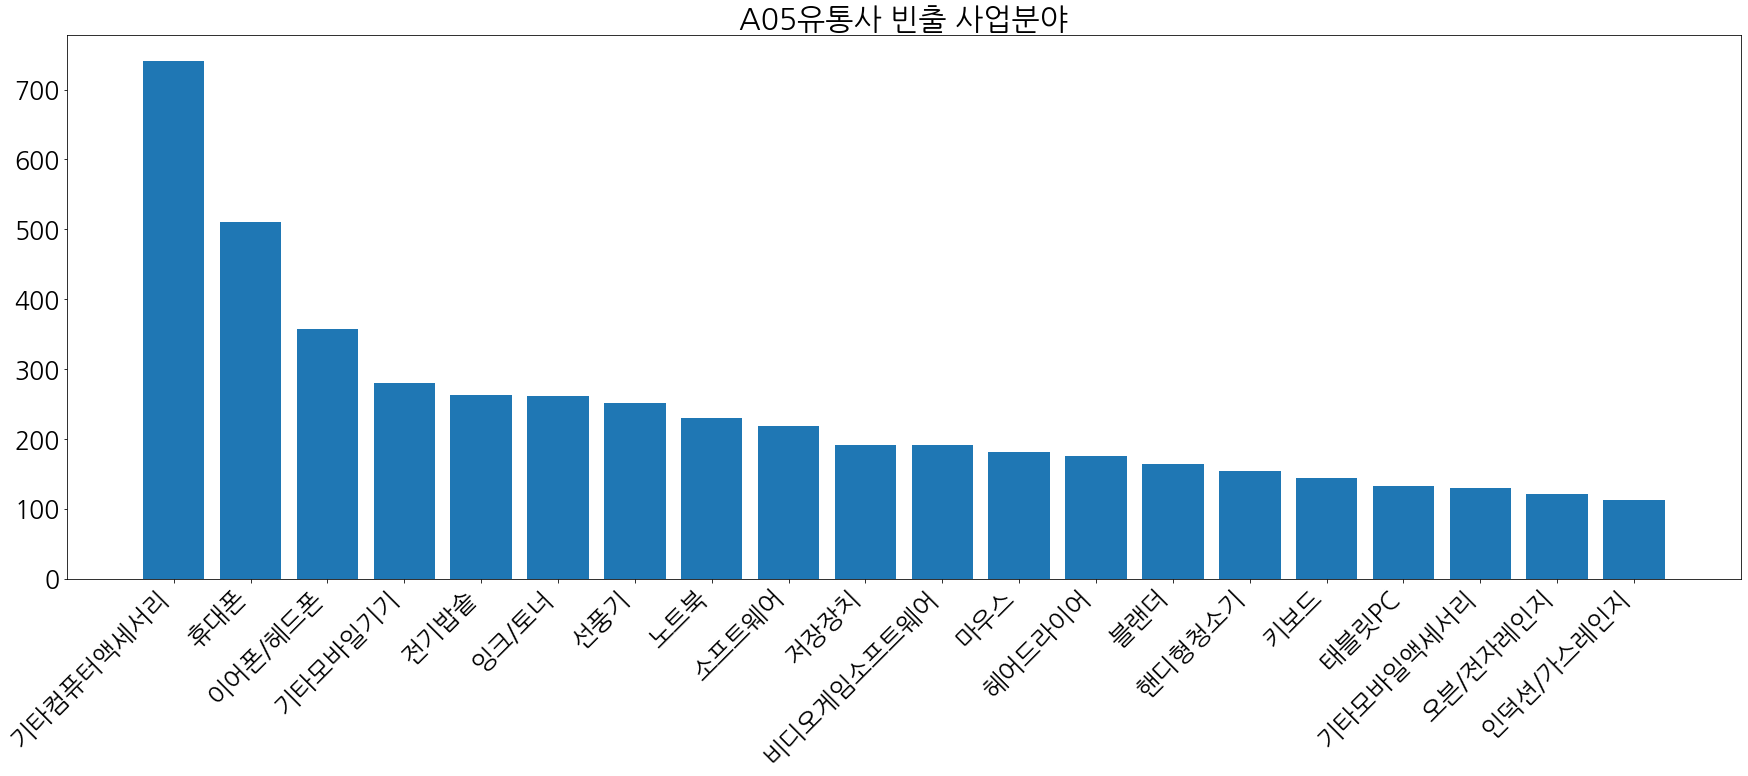

In [28]:
plt.rc('font',family='NanumGothic')
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A05_pdnm_top20.index,A05_pdnm_top20.values)
plt.title('A05유통사 빈출 사업분야')
plt.show()

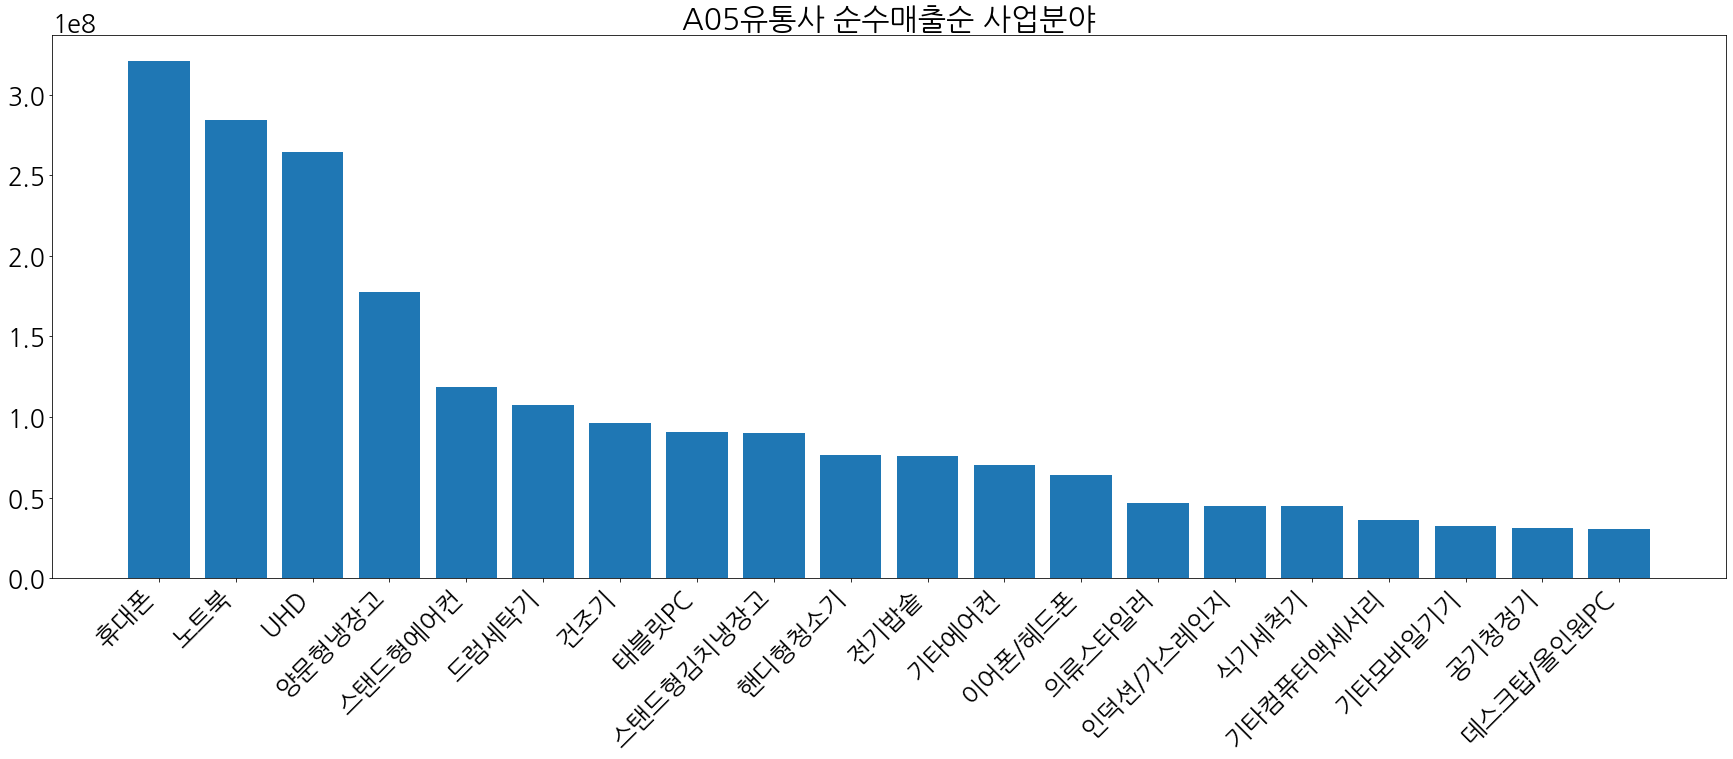

In [29]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A05_pdnm_total_buyam_top20.index,A05_pdnm_total_buyam_top20.buy_am)
plt.title('A05유통사 순수매출순 사업분야')
plt.show()

In [31]:
#가전제품 종합쇼핑몰 아닐까 예상
data_a05.chnl_dv.value_counts()
#여기도 온라인결제면 점포코드 누락이 있는 것을보면 종합 전자상개내에 여러 점포가 있는 경우인것으로 판단

1    7034
2    1147
Name: chnl_dv, dtype: int64

## A06 추측

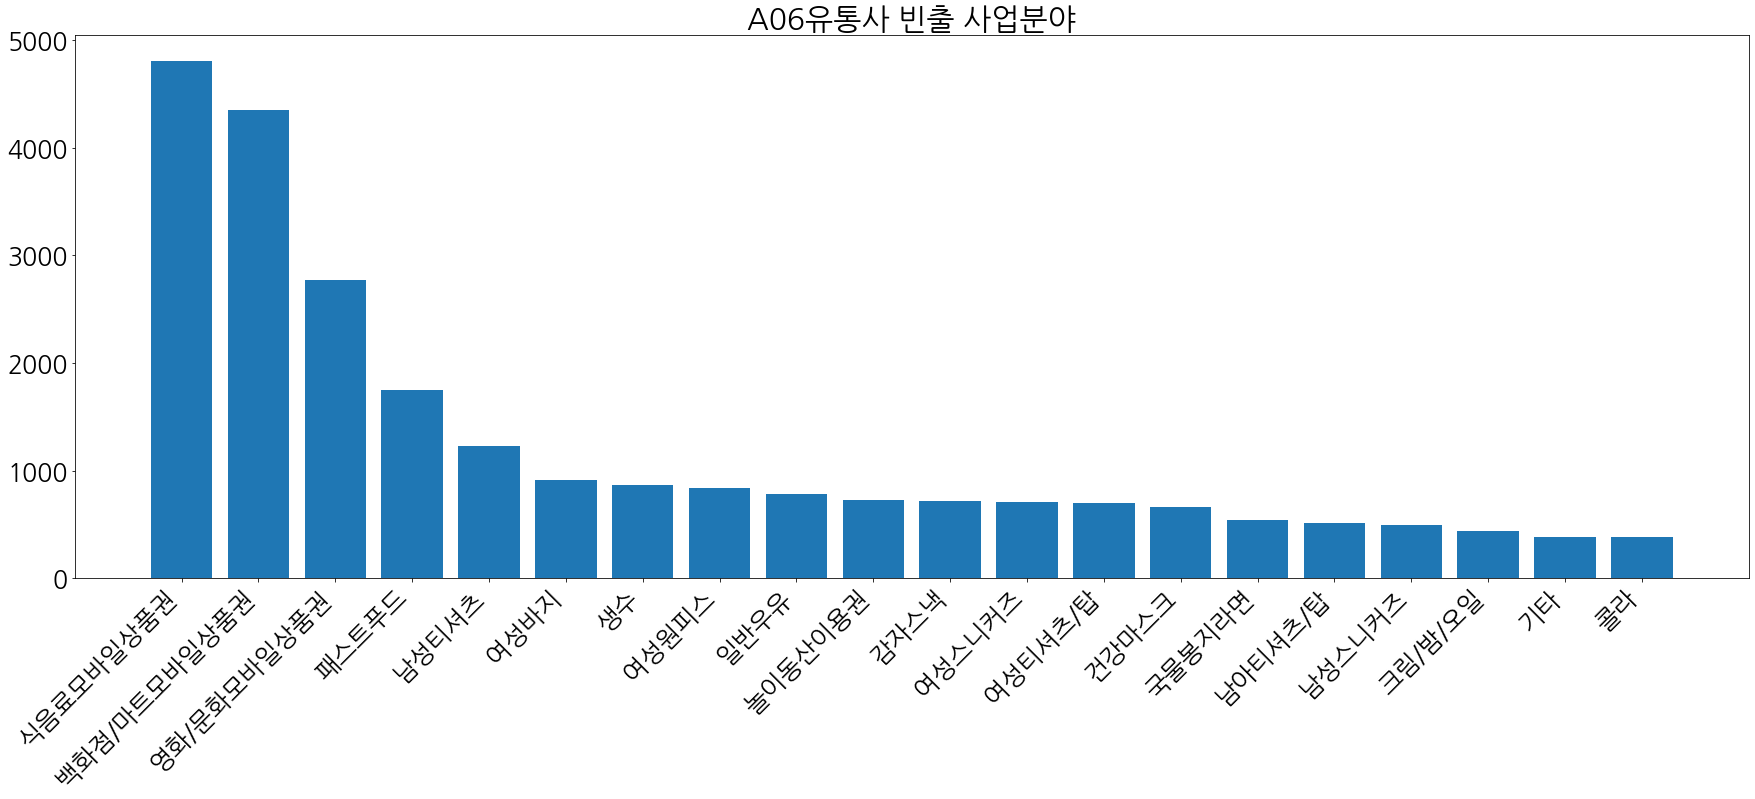

In [32]:
plt.rc('font',family='NanumGothic')
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A06_pdnm_top20.index,A06_pdnm_top20.values)
plt.title('A06유통사 빈출 사업분야')
plt.show()

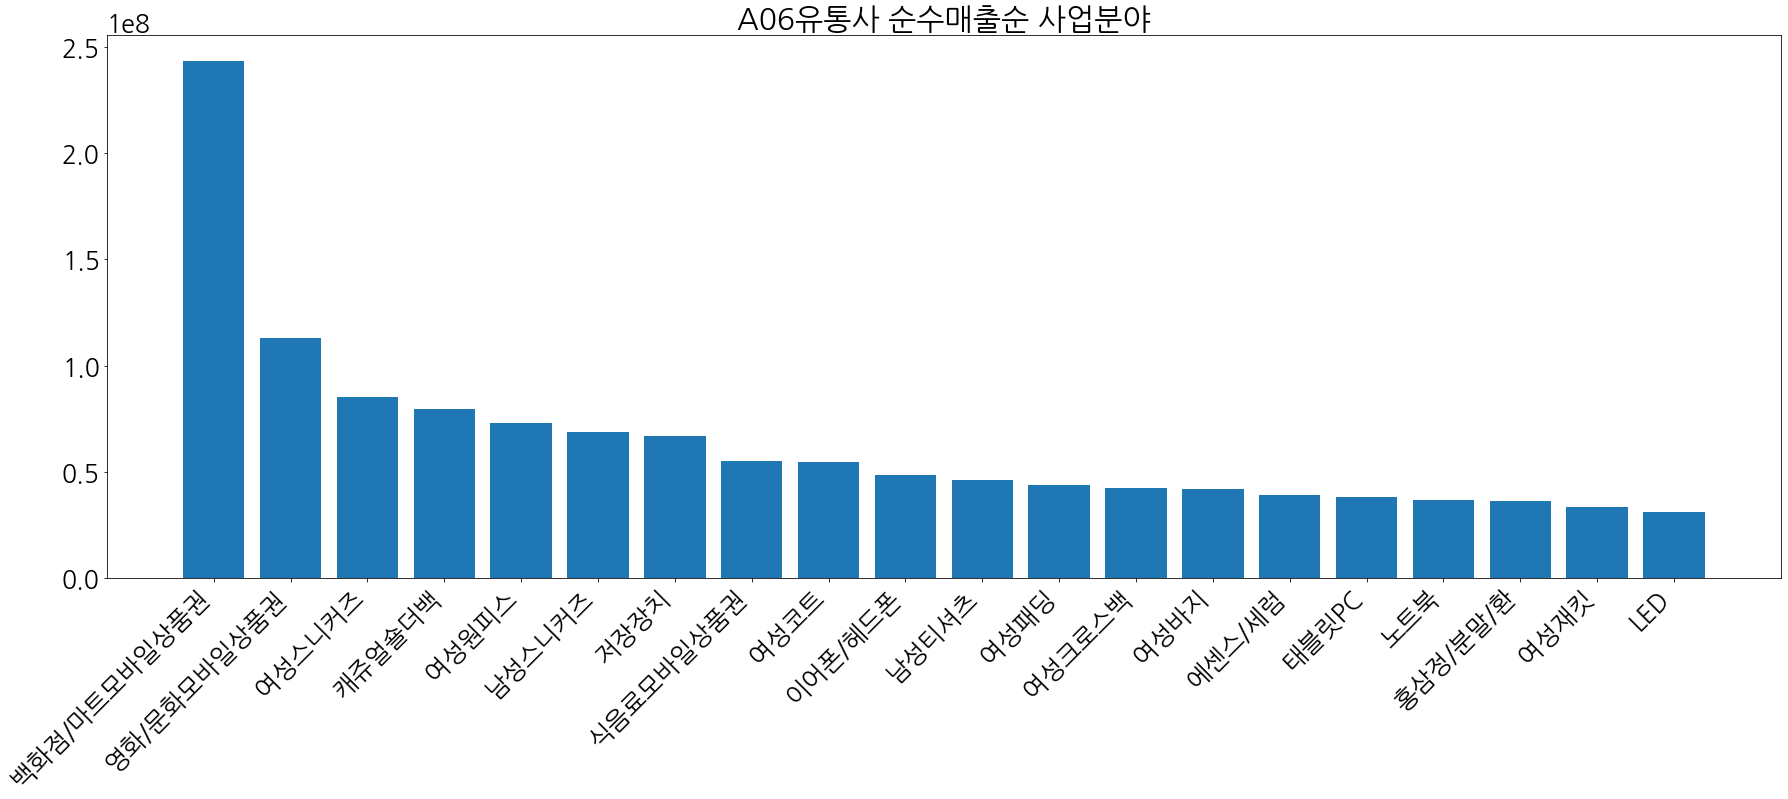

In [33]:
plt.figure(figsize=(30,10))
plt.rc('font', size=25)
plt.xticks(rotation=45,ha='right' )
plt.bar(A06_pdnm_total_buyam_top20.index,A06_pdnm_total_buyam_top20.buy_am)
plt.title('A06유통사 순수매출순 사업분야')
plt.show()

In [35]:
#여긴 아마 롯데온 같은 온라인 쇼핑몰이 아닐까 추측
data_a06.chnl_dv.value_counts()
#역시 전부 온라인 결제

2    76248
Name: chnl_dv, dtype: int64

# 유통사 데이터 저장

In [40]:
data_a01[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A01.csv",index=False,encoding='utf-8-sig')
data_a02[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A02.csv",index=False,encoding='utf-8-sig')
data_a03[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A03.csv",index=False,encoding='utf-8-sig')
data_a04[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A04.csv",index=False,encoding='utf-8-sig')
data_a05[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A05.csv",index=False,encoding='utf-8-sig')
data_a06[['cust', 'pd_c', 'cop_c', 'de_dt', 'de_hr', 'buy_am', 'ma_fem_dv', 'ages', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm']].to_csv("A06.csv",index=False,encoding='utf-8-sig')